<a href="https://colab.research.google.com/github/Yomunozs/Procesamiento_Digital_de_Imagenes/blob/main/PDI_taller_opmorfologicas_22_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se carga codigo original para obtener la base de datos

In [ ]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir

    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
load_data('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

--2024-12-01 16:47:49--  https://docs.google.com/uc?export=download&confirm=&id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
Resolving docs.google.com (docs.google.com)... 142.251.12.102, 142.251.12.138, 142.251.12.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.12.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download [following]
--2024-12-01 16:47:49--  https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18197214 (17M) [application/octet-stream]
Saving to: ‘parches.zip’

parches.zip         100%[===================>]  17.35M  26.8MB/

In [ ]:
path='/content/images/'

Se importa librerias necesarias

In [ ]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import img_as_float, exposure
from skimage.io import imread
from skimage.color import rgb2gray,rgba2rgb, gray2rgb, gray2rgba, rgb2hsv, rgb2xyz, rgb2yuv
from skimage.morphology import binary_erosion, rectangle, binary_dilation, disk, binary_opening, binary_closing, skeletonize, convex_hull_image
from skimage.morphology import remove_small_objects, white_tophat, black_tophat, square, dilation, erosion, closing, opening
from skimage.filters.rank import enhance_contrast, median, entropy

### Ejercicio 1
Crea un algoritmo que identifique y separe cada uno de los objetos presentes en la siguiente imagen, objeto en color blanco y fondo de color negro:

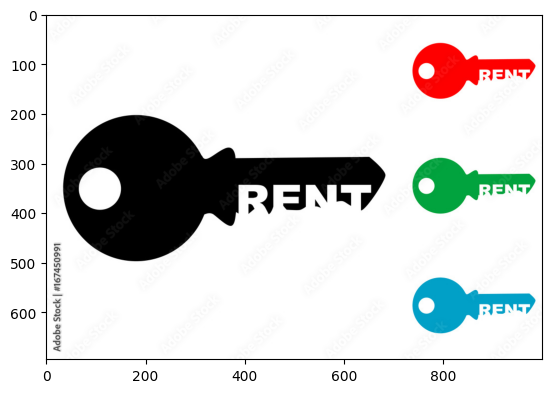

In [ ]:
imo = np.array(mpimg.imread(path+'llaves.jpg'))
plt.imshow(imo)

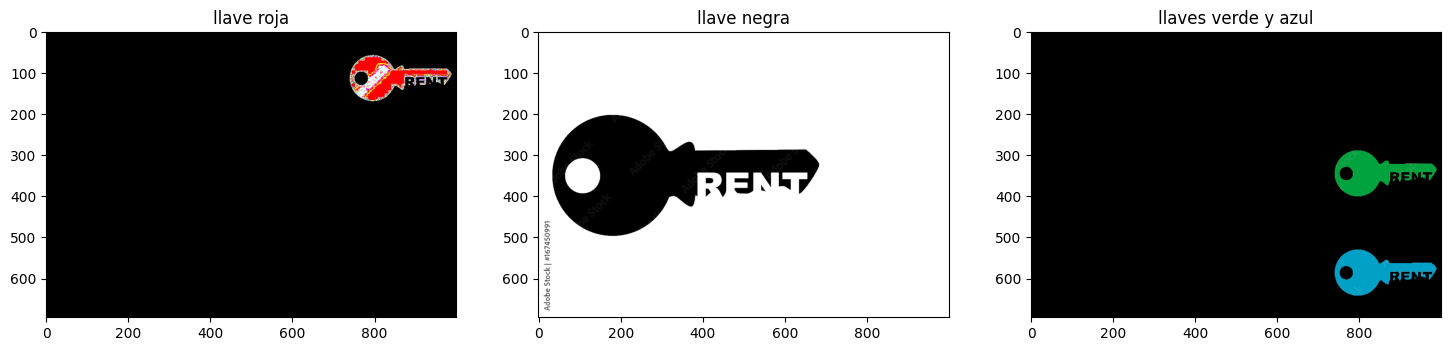

In [ ]:
# Convertir la imagen a escala de grises
gray_image = rgb2gray(imo)

# Convertir la imagen en escala de grises a binaria
threshold = 0.5
binary_image = gray_image > threshold

# Obtener el canal rojo ([:,:,0]) de la imagen original y convertirlo a binario
red_channel = imo[:, :, 0]
binary_red_channel = red_channel > 127

# plt.imshow(binary_red_channel, cmap='gray')
# plt.title('Canal rojo convertido a binario')
# plt.show()
zero_indices = np.where(binary_red_channel ==0)
binary_image[zero_indices] = 1
# plt.imshow(binary_image, cmap='gray')

capa_roja_indices = np.where(binary_image != 0)
imr = imo.copy()
imb = imo.copy()
imgb = imo.copy()
imr[capa_roja_indices] = 255 #255 es color blanco
# plt.imshow(imr)
#160 para gris
#0 para negro
rojo_indices = np.where(binary_red_channel != 0)
binary_green_channel = imo[:, :, 1] > 127
binary_green_channel[rojo_indices] = 255 # Se quita la llave roja de la capa
#plt.imshow(binary_green_channel, cmap='gray')
black_indices = np.where(binary_green_channel != 0)

imb[black_indices] = 255
#plt.imshow(imb)

imgb[binary_green_channel == 0] = 255
imgb[binary_red_channel != 0] = 255

# Correccion fondo negro
imr[imr == 255] = 0
imr[imr != 0] = 255
imgb[imgb == 255] = 0


#plt.imshow(imgb)
plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
plt.imshow(imr)
plt.title('llave roja')
plt.subplot(1, 3, 2)
plt.imshow(imb)
plt.title('llave negra')
plt.subplot(1, 3, 3)
plt.imshow(imgb)
plt.title('llaves verde y azul')
plt.show()

## Ejercicio 2

Diseña una clase que acepte una imagen en formato RGB y aplique manualmente las siguientes transformaciones:
1. Conversión de RGB a HSV.
2. Conversión de RGB a CMYK.

In [ ]:
#hsv.transform, cmyk.transform
class rgb_transform:
  def __init__(self, img):
    self.img = img
    #self.format = format

  def hsv(self):
    #if self.format == 'hsv':
    return rgb2hsv(self.img)

  def cmyk(self):
  #if self.format == 'cmyk':
    rgb_img = self.img
    if rgb_img.dtype == np.uint8:
        rgb_img = rgb_img.astype(np.float32) / 255.0

    c = 1 - rgb_img[:, :, 0]
    m = 1 - rgb_img[:, :, 1]
    y = 1 - rgb_img[:, :, 2]

    k = np.min([c, m, y], axis=0)
    c = (c - k) / (1 - k)
    m = (m - k) / (1 - k)
    y = (y - k) / (1 - k)

    cmyk_img = np.stack([c, m, y, k], axis=-1)
    return cmyk_img


  def hsv_pedal(self): # Code from gemini
    #if self.format == 'hsv':
    rgb_img = self.img
    rgb_img = self.img
    if rgb_img.dtype == np.uint8:
        rgb_img = rgb_img.astype(np.float32) / 255.0

    # Conversion to HSV
    maxc = np.max(rgb_img, axis=2)
    minc = np.min(rgb_img, axis=2)
    v = maxc

    deltac = maxc - minc
    s = deltac / (v + 1e-10) # add small value to avoid division by zero

    rc = (maxc - rgb_img[:, :, 0]) / (deltac + 1e-10)
    gc = (maxc - rgb_img[:, :, 1]) / (deltac + 1e-10)
    bc = (maxc - rgb_img[:, :, 2]) / (deltac + 1e-10)

    h = np.zeros_like(maxc)

    h[np.where(maxc == rgb_img[:, :, 0])] = bc[np.where(maxc == rgb_img[:, :, 0])] - gc[np.where(maxc == rgb_img[:, :, 0])]
    h[np.where(maxc == rgb_img[:, :, 1])] = 2.0 + rc[np.where(maxc == rgb_img[:, :, 1])] - bc[np.where(maxc == rgb_img[:, :, 1])]
    h[np.where(maxc == rgb_img[:, :, 2])] = 4.0 + gc[np.where(maxc == rgb_img[:, :, 2])] - rc[np.where(maxc == rgb_img[:, :, 2])]

    h = (h / 6.0) % 1.0
    hsv_img = np.stack([h, s, v], axis=-1)
    return hsv_img

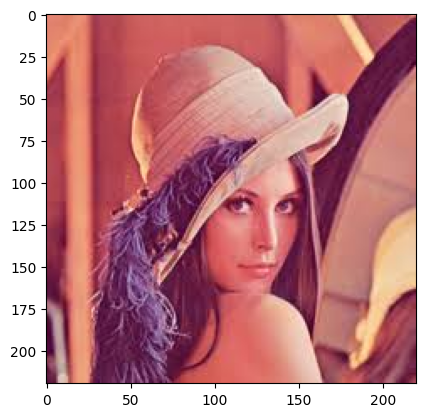

In [ ]:
img = mpimg.imread(path+'lena.jpg')
pylab.imshow(img)

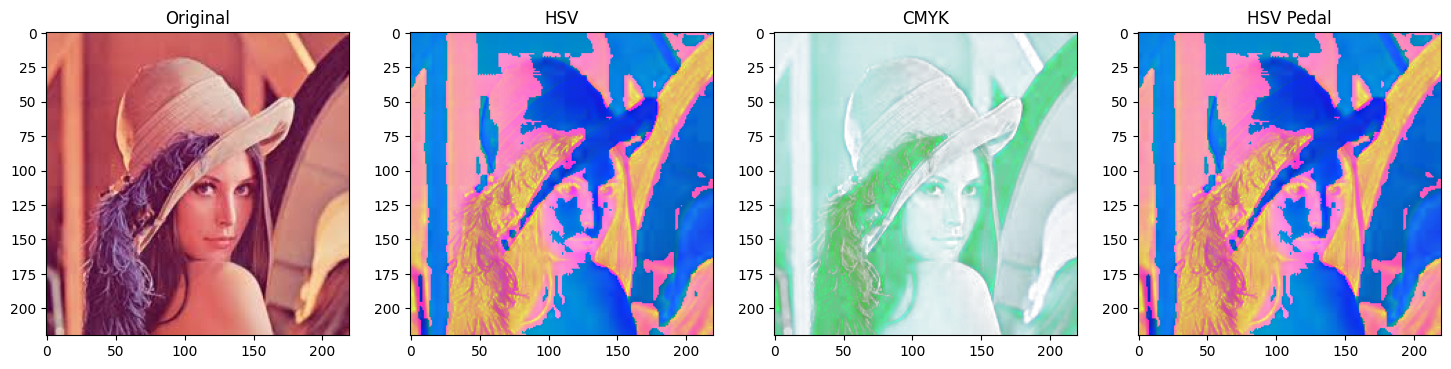

In [ ]:
img_transform = rgb_transform(img)
plt.figure(figsize=(18, 10))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1, 4, 2)
pylab.imshow(img_transform.hsv())
plt.title('HSV')
plt.subplot(1, 4, 3)
plt.imshow(img_transform.cmyk())
plt.title('CMYK')
plt.subplot(1, 4, 4)
plt.imshow(img_transform.hsv_pedal())
plt.title('HSV Pedal')
plt.show()

## Ejercicio 3
Desarrolla una clase que acepte una imagen y realice las siguientes transformaciones de forma manual:

1. Escalado de la imagen.
2. Cambio de tamaño de la imagen.


In [ ]:
from skimage.transform import rescale



class img_modify:
  def __init__(self, img):
    self.img = img

  def scale(self, scale_factor):
        orig_height, orig_width = self.img.shape[:2]
        new_height = int(orig_height * scale_factor)
        new_width = int(orig_width * scale_factor)

        # Crear una nueva imagen con el tamaño deseado
        scaled_img = np.zeros((new_height, new_width, self.img.shape[2]), dtype=self.img.dtype)

        # Calcular la relación inversa (mapear píxeles nuevos a los originales)
        y_scale = orig_height / new_height
        x_scale = orig_width / new_width

        for y in range(new_height):
            for x in range(new_width):
                # Coordenadas originales flotantes
                orig_x = x * x_scale
                orig_y = y * y_scale

                # Coordenadas de los píxeles más cercanos
                x0 = int(np.floor(orig_x))
                x1 = min(x0 + 1, orig_width - 1)
                y0 = int(np.floor(orig_y))
                y1 = min(y0 + 1, orig_height - 1)

                # Distancias a los bordes
                dx = orig_x - x0
                dy = orig_y - y0

                # Interpolación bilineal
                top = (1 - dx) * self.img[y0, x0] + dx * self.img[y0, x1]
                bottom = (1 - dx) * self.img[y1, x0] + dx * self.img[y1, x1]
                pixel_value = (1 - dy) * top + dy * bottom

                # Asignar valor al nuevo píxel
                scaled_img[y, x] = pixel_value

        return scaled_img

  def resize(self, new_size):

        orig_height, orig_width = self.img.shape[:2]
        new_width, new_height = new_size

        # Crear una nueva imagen con el tamaño deseado
        resized_img = np.zeros((new_height, new_width, self.img.shape[2]), dtype=self.img.dtype)

        # Calcular factores de escala
        x_scale = orig_width / new_width
        y_scale = orig_height / new_height

        for y in range(new_height):
            for x in range(new_width):
                # Mapear al píxel original más cercano
                orig_x = int(x * x_scale)
                orig_y = int(y * y_scale)

                resized_img[y, x] = self.img[orig_y, orig_x]

        return resized_img





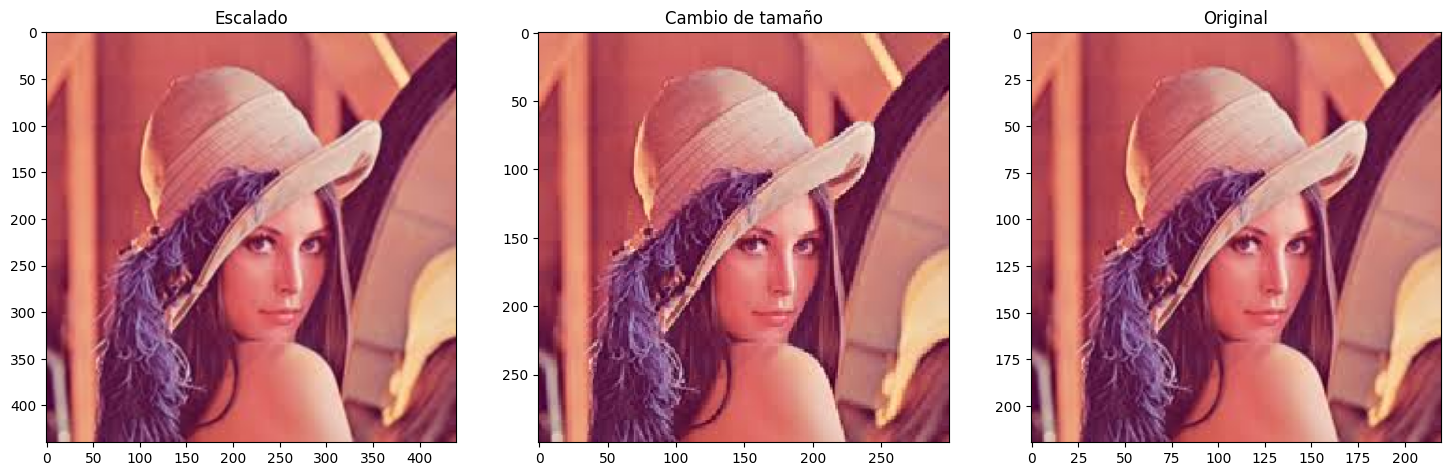

In [ ]:
img_transform = img_modify(img)
plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_transform.scale(2))
plt.title('Escalado')
plt.subplot(1, 3, 2)
plt.imshow(img_transform.resize((300, 300)))
plt.title('Cambio de tamaño')
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.title('Original')
plt.show()

## Ejercicio 4

Reproduce los procesos enseñados en clase utilizando la biblioteca [Opencv](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html). Aplica las mismas transformaciones usando las funciones proporcionadas por la librería.)

In [ ]:
import cv2
class img_modify_opencv:
  def __init__(self, img):
    self.img = img

  def scale(self, scale_factor):
    img = self.img
    return cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

  def resize(self, new_size):
    return cv2.resize(self.img, new_size, interpolation=cv2.INTER_LINEAR)

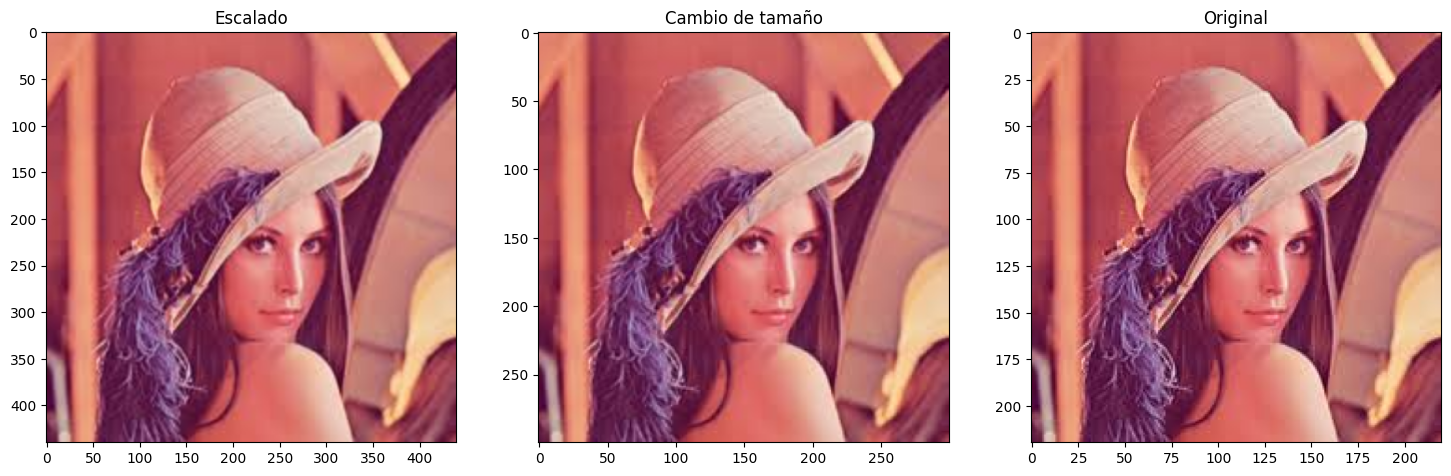

In [ ]:
img_transform = img_modify_opencv(img)

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_transform.scale(2))
plt.title('Escalado')
plt.subplot(1, 3, 2)
plt.imshow(img_transform.resize((300, 300)))
plt.title('Cambio de tamaño')
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.title('Original')
plt.show()

## Ejercicio 5

Crea una clase que reciba una imagen binaria y que cuente con métodos para realizar las operaciones morfológicas que se han visto en clase.


In [ ]:
class morph:
  def __init__(self, img):
    self.img = img

  def erosion(self, kernel):
    return binary_erosion(self.img, kernel)

  def dilation(self, kernel):
    return binary_dilation(self.img, kernel)

  def opening(self, kernel):
    return binary_opening(self.img, kernel)

  def closing(self, kernel):
    return binary_closing(self.img, kernel)

  def skeletonize(self):
    return skeletonize(self.img)

  def convex_hull(self):
    return convex_hull_image(self.img)

  def remove_small_objects(self, min_size):
    im1 = self.img.astype(np.bool_)
    for osz in [50, 200, 500]:
      im1 = remove_small_objects(im1, osz, connectivity=1)
    return im1

  def white_tophat(self, kernel):
    return white_tophat(self.img, kernel)

  def black_tophat(self, kernel):
    return black_tophat(self.img, kernel)

  def boundary(self):
    return self.img - binary_dilation(self.img, kernel)

  def enhance_contrast(self, selem):
    return enhance_contrast(self.img, selem)

  def equalize(self):
    return exposure.equalize_hist(self.img)

  def median(self, selem):
    return median(self.img, selem)

  def entropy(self, selem):
    return entropy(self.img, selem)

  def gradient(self, size):
    return ndimage.morphological_gradient(self.img, size=size)

  def laplace(self, size):
    return ndimage.morphological_laplace(self.img, size=size)


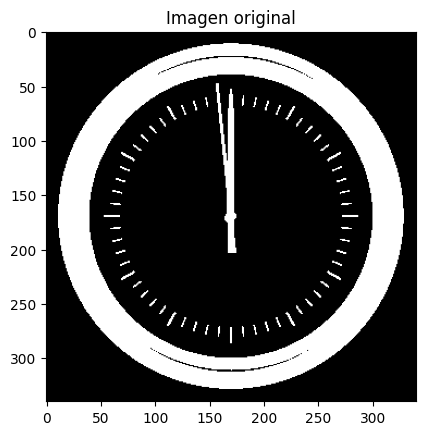

<ipython-input-15-b6aa408e931a>:45: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imshow(img_transform.enhance_contrast(square(3)), cmap='gray')
<ipython-input-15-b6aa408e931a>:51: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imshow(img_transform.median(square(3)), cmap='gray')
<ipython-input-15-b6aa408e931a>:54: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imshow(img_transform.entropy(square(3)), cmap='gray')


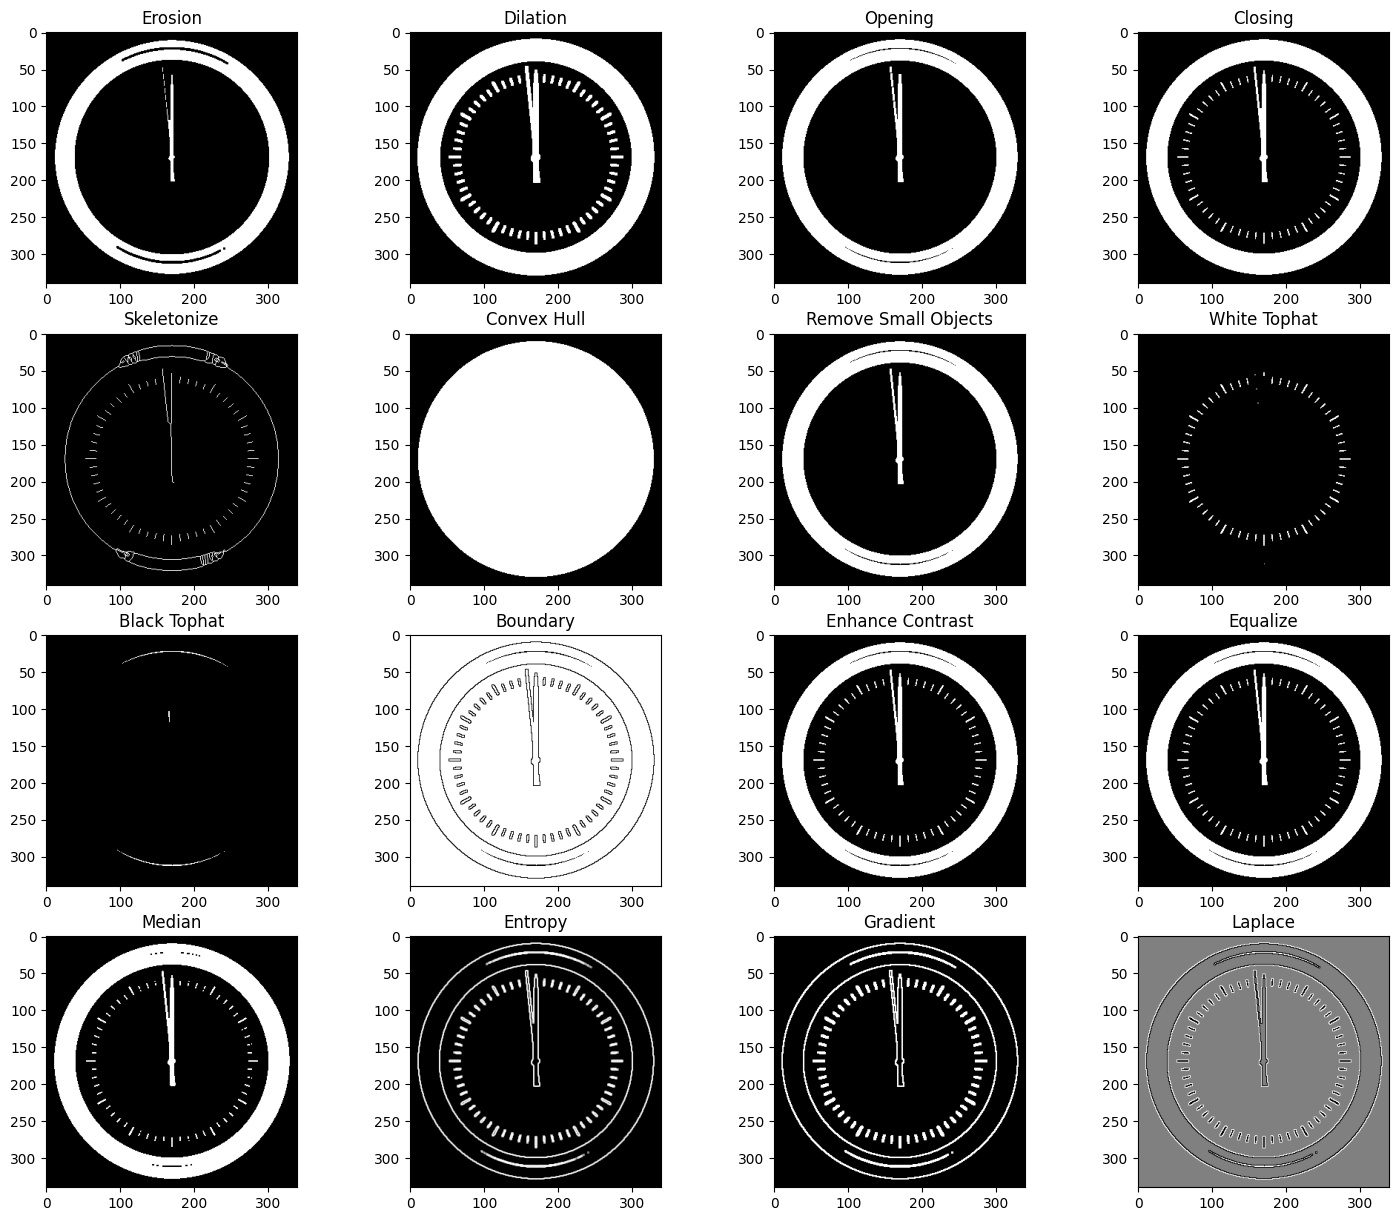

In [ ]:
im = rgb2gray(imread(path+'clock2.jpg'))
imo = mpimg.imread(path+'clock2.jpg')
# Modifica la imagen a forma binaria
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
plt.imshow(im, cmap='gray')
plt.title('Imagen original')
plt.show()
kernel = rectangle(3,3)

img_transform = morph(im)
imo_transform = morph(imo)
plt.figure(figsize=(18, 15))
plt.subplot(4,4,1)
plt.imshow(img_transform.erosion(kernel), cmap='gray')
plt.title('Erosion')
plt.subplot(4,4,2)
plt.imshow(img_transform.dilation(square(3)), cmap='gray')
plt.title('Dilation')
plt.subplot(4,4,3)
plt.imshow(img_transform.opening(square(3)), cmap='gray')
plt.title('Opening')
plt.subplot(4,4,4)
plt.imshow(img_transform.closing(square(3)), cmap='gray')
plt.title('Closing')
plt.subplot(4,4,5)
plt.imshow(img_transform.skeletonize(), cmap='gray')
plt.title('Skeletonize')
plt.subplot(4,4,6)
plt.imshow(img_transform.convex_hull(), cmap='gray')
plt.title('Convex Hull')
plt.subplot(4,4,7)
plt.imshow(img_transform.remove_small_objects(100), cmap='gray')
plt.title('Remove Small Objects')
plt.subplot(4,4,8)
plt.imshow(img_transform.white_tophat(square(3)), cmap='gray')
plt.title('White Tophat')
plt.subplot(4,4,9)
plt.imshow(img_transform.black_tophat(square(3)), cmap='gray')
plt.title('Black Tophat')
plt.subplot(4,4,10)
plt.imshow(img_transform.boundary(), cmap='gray')
plt.title('Boundary')
plt.subplot(4,4,11)
plt.imshow(img_transform.enhance_contrast(square(3)), cmap='gray')
plt.title('Enhance Contrast')
plt.subplot(4,4,12)
plt.imshow(img_transform.equalize(), cmap='gray')
plt.title('Equalize')
plt.subplot(4,4,13)
plt.imshow(img_transform.median(square(3)), cmap='gray')
plt.title('Median')
plt.subplot(4,4,14)
plt.imshow(img_transform.entropy(square(3)), cmap='gray')
plt.title('Entropy')
plt.subplot(4,4,15)
plt.imshow(img_transform.gradient(3), cmap='gray')
plt.title('Gradient')
plt.subplot(4,4,16)
plt.imshow(img_transform.laplace(3), cmap='gray')
plt.title('Laplace')
plt.show()
